In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from langdetect import detect
import re



In [63]:
# Load dataset
df = pd.read_csv("jamalon dataset.csv")



In [64]:

# Starting **EDA**
print("Number of null fields in each column:")
print(df.isnull().sum())

Number of null fields in each column:
Unnamed: 0            0
Title                 0
Author                0
Description         574
Pages                 0
Publication year      0
Publisher             0
Cover                 0
Category              0
Subcategory           0
Price                 0
dtype: int64


In [65]:

# Check for duplicates

def print_duplicate_stats(df, column):
    duplicates = df[column].value_counts()
    print(f"\nDuplicate analysis for {column}:")
    print(f"Total rows: {len(df)}")
    print(f"Unique values: {df[column].nunique()}")
    print(f"Number of duplicated values: {len(df[df[column].duplicated()])}")
    
    if len(duplicates[duplicates > 1]) > 0:
        print("\nMost common duplicates:")
        print(duplicates[duplicates > 1].head())
        
        # Show full details of some duplicated entries
        print("\nSample of duplicated entries (first 2 duplicates):")
        for title in duplicates[duplicates > 1].head(2).index:
            print(f"\nAll entries for title: {title}")
            print(df[df[column] == title][['Title', 'Author', 'Publisher', 'Publication year', 'Price']].to_string())

print("Check for duplicates:\t" + str(df.duplicated().sum()))
#Initial duplicate analysis
print_duplicate_stats(df, 'Title')

Check for duplicates:	0

Duplicate analysis for Title:
Total rows: 8986
Unique values: 8138
Number of duplicated values: 848

Most common duplicates:
Title
دور المنظمات الدولية غير الحكومية في عمليات بناء السلام في إفريقيا بعد انتهاء الحرب الباردة    13
صاحب الظل الطويل                                                                               12
البؤساء                                                                                        11
أوروبا والوطن العربي                                                                           11
الإرهاب العالمي والتطرف                                                                        11
Name: count, dtype: int64

Sample of duplicated entries (first 2 duplicates):

All entries for title:  دور المنظمات الدولية غير الحكومية في عمليات بناء السلام في إفريقيا بعد انتهاء الحرب الباردة
                                                                                             Title      Author               Publisher  Publication year  Price

In [66]:

# number of each column value type
for i in df.columns:
    print(i+"column")
    print(df[i].value_counts())
print("Unique values per column:\n", df.nunique())

Unnamed: 0column
Unnamed: 0
11002    1
0        1
1        1
2        1
3        1
        ..
42       1
43       1
45       1
46       1
47       1
Name: count, Length: 8986, dtype: int64
Titlecolumn
Title
دور المنظمات الدولية غير الحكومية في عمليات بناء السلام في إفريقيا بعد انتهاء الحرب الباردة    13
صاحب الظل الطويل                                                                               12
البؤساء                                                                                        11
أوروبا والوطن العربي                                                                           11
الإرهاب العالمي والتطرف                                                                        11
                                                                                               ..
تفهم تكنولوجيا الليزر                                                                           1
الفيزياء العملية                                                                                1
الفيزياء 

In [67]:



# Summary statistics of pages, publication year, price
print(df.describe())

         Unnamed: 0         Pages  Publication year        Price
count   8986.000000   8986.000000       8986.000000  8986.000000
mean    6090.685845    290.197196       1446.235366    51.504644
std     3153.582548    550.010609        902.201453    62.425666
min        0.000000      0.000000          0.000000     0.340000
25%     3442.750000    144.000000          0.000000    18.750000
50%     6504.500000    232.000000       2006.000000    35.630000
75%     8753.750000    352.000000       2015.000000    56.250000
max    11002.000000  41520.000000       2020.000000   937.560000


In [68]:

# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 80]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) // nGraphPerRow
    plt.figure(num =  None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xlabel(columnNames[i])
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [69]:


# ** CLEANING **

# Create clean_df and track initial copy
clean_df = df.copy()

def is_english(text):
    # Helper function to check if text contains English characters
    try:
        # Check if the text contains English letters
        english_pattern = re.compile(r'[a-zA-Z]')
        return bool(english_pattern.search(str(text)))
    except:
        return False


def print_removal_stats(df_before, df_after, step_name):
    rows_removed = len(df_before) - len(df_after)
    print(f"\n{step_name}:")
    print(f"Rows removed: {rows_removed}")
    print(f"Rows remaining: {len(df_after)}")
    if rows_removed > 0:
        print("Sample of removed items:")
        removed_df = df_before[~df_before.index.isin(df_after.index)]
        print(removed_df['Title'].head())
    


In [70]:


#Function to choose which duplicate to keep
def choose_best_duplicate(group):
    if len(group) == 1:
        return group.iloc[0]
    
    # If prices differ, keep the one with the lowest non-zero price
    non_zero_prices = group[group['Price'] > 0]
    if not non_zero_prices.empty:
        return non_zero_prices.nsmallest(1, 'Price').iloc[0]
    
    # If publication years differ, keep the newest one
    if group['Publication year'].nunique() > 1:
        return group.nlargest(1, 'Publication year').iloc[0]
    
    # If descriptions differ in length, keep the longest non-null description
    desc_lengths = group['Description'].fillna('').str.len()
    if desc_lengths.max() > 0:
        return group.iloc[desc_lengths.idxmax()]
    
    # If all else is equal, keep the first one
    return group.iloc[0]



In [71]:

#Drop unnamed and Cover columns
clean_df = clean_df.drop(columns=['Unnamed: 0', 'Cover'])

#Remove duplicates while keeping the best version
print("\nRemoving duplicates...")
df_before = clean_df.copy()
clean_df = clean_df.groupby('Title', as_index=False).apply(choose_best_duplicate)


#Print removal statistics
print_removal_stats(df_before, clean_df, "Deduplication removal")

#Remove English titles
print("\nBefore English title removal:")
print("Total rows:", len(clean_df))
english_titles = clean_df[clean_df['Title'].apply(is_english)]
print("Found English titles:", len(english_titles))
if len(english_titles) > 0:
    print("Sample of English titles to be removed:")
    print(english_titles['Title'].head())

df_before = clean_df.copy()
clean_df = clean_df[~clean_df['Title'].apply(is_english)]
print_removal_stats(df_before, clean_df, "Removing English titles")



Removing duplicates...

Deduplication removal:
Rows removed: 848
Rows remaining: 8138
Sample of removed items:
8138                                العرب والعالم المعاصر
8139    خطاب العلم والتقدم : حوار نقدي مع الدكتور إبرا...
8140                   فلسفة الحياة : دراسة الفكر والوجود
8141    في الخلاص النهائي : مقال في وعود الإسلاميين وا...
8142                   ساطع الحصري وفلسفة القومية العربية
Name: Title, dtype: object

Before English title removal:
Total rows: 8138
Found English titles: 225
Sample of English titles to be removed:
0     "Al Muwatta (The Approved) الموطأ للإمام مالك...
1     "Apercu des Grandes Ames de LHumanite du Prop...
2     "De la douceur de vivre a seville a la douleu...
3                                     "LIBAN 1880-1914
4     "La Revolution Tunisienne semparer de lhistoire"
Name: Title, dtype: object

Removing English titles:
Rows removed: 225
Rows remaining: 7913
Sample of removed items:
0     "Al Muwatta (The Approved) الموطأ للإمام مالك...
1     "Ape

/tmp/ipykernel_101403/1058393129.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  clean_df = clean_df.groupby('Title', as_index=False).apply(choose_best_duplicate)


In [72]:

#Clean Description
print("\nBefore Description cleaning:")
print("Null values:", clean_df['Description'].isna().sum())
print("'None' string values (including spaces):", 
      clean_df['Description'].astype(str).str.strip().isin(['None', 'nan', '']).sum())

df_before = clean_df.copy()
clean_df = clean_df[
    clean_df['Description'].notna() & 
    ~clean_df['Description'].astype(str).str.strip().isin(['None', 'nan', '']) & 
    (clean_df['Description'].astype(str).str.strip() != '')
]
print_removal_stats(df_before, clean_df, "Removing invalid descriptions")

#Clean Author field
df_before = clean_df.copy()
clean_df = clean_df[
    ~clean_df['Author'].astype(str).str.strip().isin(['لا يوجد', 'None', 'nan', '']) & 
    clean_df['Author'].notna() & 
    (clean_df['Author'].astype(str).str.strip() != '')
]
print_removal_stats(df_before, clean_df, "Removing invalid authors")

# Clean Publication Year
df_before = clean_df.copy()
clean_df = clean_df[
    (clean_df['Publication year'] != 0) & 
    clean_df['Publication year'].notna() & 
    (clean_df['Publication year'] >= 1800) & 
    (clean_df['Publication year'] <= 2024)
]
print_removal_stats(df_before, clean_df, "Removing invalid years")



Before Description cleaning:
Null values: 566
'None' string values (including spaces): 4011

Removing invalid descriptions:
Rows removed: 4011
Rows remaining: 3902
Sample of removed items:
15     "أعمال المؤتمر السادس للثقافة الشعبية العربية...
16     "إسرائيل في المعركة وفي الحلبة الدولية، وثائق...
17                             "إسرائيل والأمم المتحدة"
18     "إيباك الأجندة الأميركية لمصلحة الكيان الصهيوني"
19     "الإطار الفكري والتطبيقي للتصميم المحاسبي الل...
Name: Title, dtype: object

Removing invalid authors:
Rows removed: 44
Rows remaining: 3858
Sample of removed items:
34      "مؤتمر هرتسيليا العاشر؛ وثائق وأوراق عمل (إسر...
72                             5 تجارب مسرحية من البحرين
543                        أطلس العالم؛ أطلس جغرافي مصور
583                                            أكسكالبور
899                      استراتيجيّات التسويق الإلكتروني
Name: Title, dtype: object

Removing invalid years:
Rows removed: 687
Rows remaining: 3171
Sample of removed items:
23     "التق

In [73]:

#Apply category mapping
category_map = {
    "الأدب والخيال": "0000000000001",
    "الكتب الإسلامية": "0000000000010",
    "الاقتصاد والأعمال": "0000000000100",
    "الفلسفة": "0000000001000",
    "الصحافة والإعلام": "0000000010000",
    "الكتب السياسية": "0000000100000",
    "العلوم والطبيعة": "0000001000000",
    "الأسرة والطفل": "0000010000000",
    "السير والمذكرات": "0000100000000",
    "الفنون": "0001000000000",
    "التاريخ والجغرافيا": "0010000000000",
    "الرياضة والتسلية": "0100000000000",
    "الشرع والقانون": "1000000000000"
}

clean_df['Category'] = clean_df['Category'].map(category_map)


In [74]:

# Final verification
print("\nFinal verification:")
print("Checking for English titles:")
remaining_english = clean_df[clean_df['Title'].apply(is_english)]
if len(remaining_english) > 0:
    print("WARNING: Still found English titles:")
    print(remaining_english['Title'].head())
else:
    print("No English titles remaining")

print("\nChecking for 'None' values in Description:")
none_desc = clean_df[clean_df['Description'].astype(str).str.strip().isin(['None', 'nan', ''])]
if len(none_desc) > 0:
    print("WARNING: Still found rows with 'None' in Description:")
    print(none_desc[['Title', 'Description']].head())
else:
    print("No 'None' values found in Description")

print("Checking for duplicates")
print_duplicate_stats(clean_df, 'Title')

# Save the cleaned dataset
# Clean any remaining whitespace
for col in clean_df.columns:
    if clean_df[col].dtype == object:
        clean_df[col] = clean_df[col].astype(str).str.strip()

# Save with explicit encoding and quoting
clean_df.to_csv("~/Downloads/outputnotebook.csv", 
                index=False, 
                encoding='utf-8-sig',
                quoting=1)


# Verify the saved file
print("\nVerifying saved file:")
verification_df = pd.read_csv("~/Downloads/outputnotebook.csv")
print("Final row count:", len(verification_df))
print("\nSample of final data:")
print(verification_df[['Title', 'Author', 'Description']].head(2).to_string())



Final verification:
Checking for English titles:
No English titles remaining

Checking for 'None' values in Description:
No 'None' values found in Description
Checking for duplicates

Duplicate analysis for Title:
Total rows: 3171
Unique values: 3171
Number of duplicated values: 0

Verifying saved file:
Final row count: 3171

Sample of final data:
                                               Title      Author                                                                                                                                                                                                                                                                                                                                                                                                                                        Description
0  "التشبيك وميثاق الممارسة في عمل المنظمات الأهلية"   يوسف حجار  تقرير يوثق أعمال ورشة عمل (1995) عن محاولة صياغة ميثاق ممارسة يحدد أصول التعامل فيم

In [75]:


# **Relationships visualization**

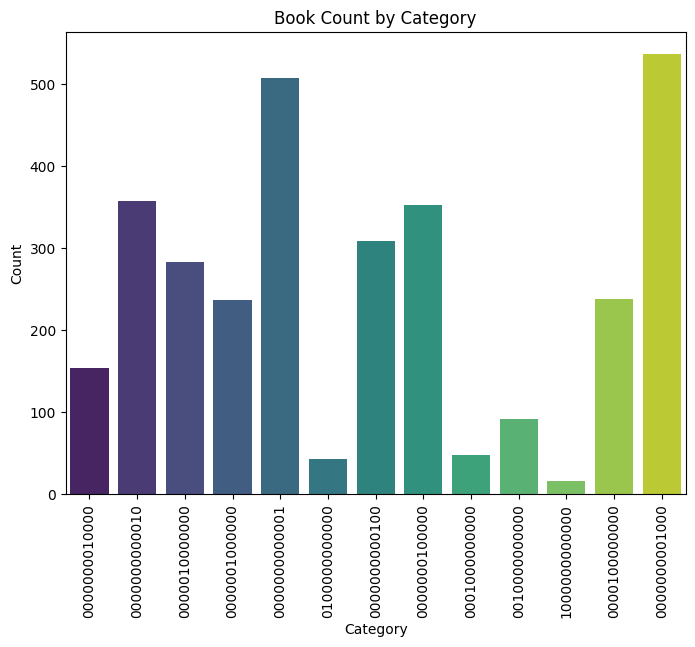

In [76]:


# **Book Count by Category**
# do we have enough books for each catogory is a catogory overpresented ?
plt.figure(figsize=(8, 6))
sns.countplot(data=clean_df, x='Category', palette='viridis', hue='Category', legend=False)
plt.title("Book Count by Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=90) 
plt.show()


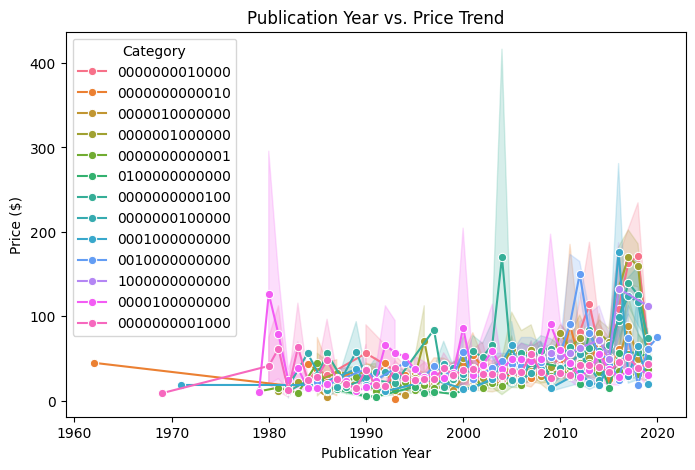

In [77]:

# **Year vs. Price**
# Does newer books are more expensive ?
plt.figure(figsize=(8, 5))
sns.lineplot(data=clean_df, x='Publication year', y='Price', marker='o', hue='Category')
plt.title("Publication Year vs. Price Trend")
plt.xlabel("Publication Year")
plt.ylabel("Price ($)")
plt.show()


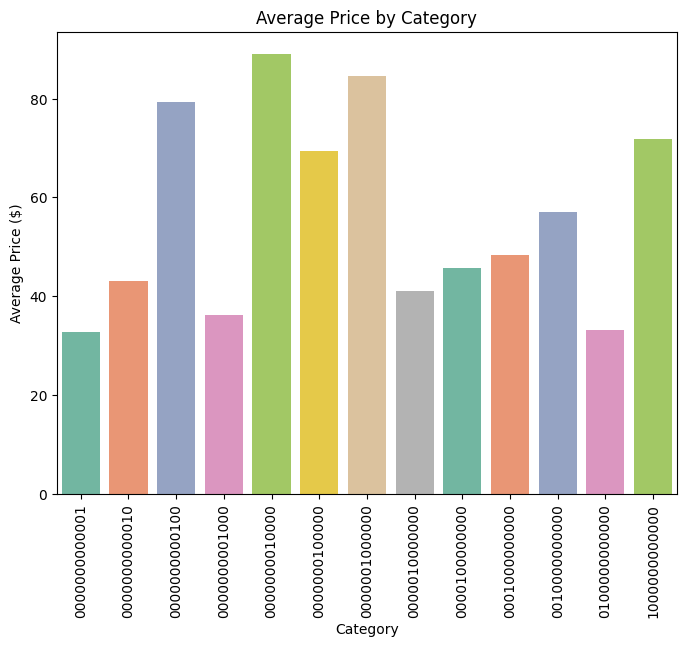

In [78]:

# **Price vs Category**
plt.figure(figsize=(8, 6))
df_grouped = clean_df.groupby('Category')['Price'].mean().reset_index()
sns.barplot(data=df_grouped, x='Category', y='Price', hue='Category', palette='Set2', legend=False)
plt.title("Average Price by Category")
plt.xlabel("Category")
plt.ylabel("Average Price ($)")
plt.xticks(rotation=90)  
plt.show()


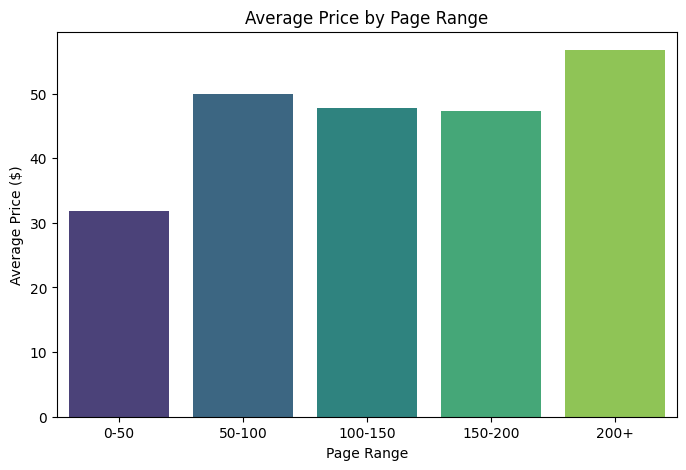

In [79]:

# **Price vs Pages** 
bins = [0, 50, 100, 150, 200, float('inf')]  
labels = ['0-50', '50-100', '100-150', '150-200', '200+']
clean_df['Page Range'] = pd.cut(clean_df['Pages'], bins=bins, labels=labels, right=False)

df_grouped = clean_df.groupby('Page Range', observed=False)['Price'].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(data=df_grouped, x='Page Range', y='Price', palette='viridis', hue='Page Range', legend=False)
plt.title("Average Price by Page Range")
plt.xlabel("Page Range")
plt.ylabel("Average Price ($)")
plt.show()